# import, csv, json

In [54]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf   
## if error: python3.6 -m pip install scipy==1.2 --upgrade
import json 
import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [39]:
df = pd.read_csv('data/clean.csv',low_memory=False)
print(df.shape)

(29473, 1186)


In [40]:
# Opening JSON file 

## http://ddragon.leagueoflegends.com/cdn/10.14.1/data/en_US/champion.json
## change the 10.14 to whatever the current patch is, for all champion data

with open('data/championids.json',  encoding='utf-8') as f:
    champion_data = json.load(f)

In [41]:
print(champion_data.keys())

dict_keys(['type', 'format', 'version', 'data'])


In [42]:
pprint.pprint(champion_data['data'])

{'Aatrox': {'blurb': 'Once honored defenders of Shurima against the Void, '
                     'Aatrox and his brethren would eventually become an even '
                     'greater threat to Runeterra, and were defeated only by '
                     'cunning mortal sorcery. But after centuries of '
                     'imprisonment, Aatrox was the first to find...',
            'id': 'Aatrox',
            'image': {'full': 'Aatrox.png',
                      'group': 'champion',
                      'h': 48,
                      'sprite': 'champion0.png',
                      'w': 48,
                      'x': 0,
                      'y': 0},
            'info': {'attack': 8, 'defense': 4, 'difficulty': 4, 'magic': 3},
            'key': '266',
            'name': 'Aatrox',
            'partype': 'Blood Well',
            'stats': {'armor': 38,
                      'armorperlevel': 3.25,
                      'attackdamage': 60,
                      'attackdamageperlevel'

          'stats': {'armor': 34,
                    'armorperlevel': 4,
                    'attackdamage': 52,
                    'attackdamageperlevel': 3,
                    'attackrange': 500,
                    'attackspeed': 0.625,
                    'attackspeedperlevel': 2,
                    'crit': 0,
                    'critperlevel': 0,
                    'hp': 575,
                    'hpperlevel': 89,
                    'hpregen': 5.5,
                    'hpregenperlevel': 0.55,
                    'movespeed': 330,
                    'mp': 350,
                    'mpperlevel': 50,
                    'mpregen': 6,
                    'mpregenperlevel': 0.45,
                    'spellblock': 30,
                    'spellblockperlevel': 0.5},
          'tags': ['Support', 'Mage'],
          'title': 'the Wandering Caretaker',
          'version': '10.14.1'},
 'Blitzcrank': {'blurb': 'Blitzcrank is an enormous, near-indestructible '
                         'a

                         'magic': 9},
                'key': '69',
                'name': 'Cassiopeia',
                'partype': 'Mana',
                'stats': {'armor': 18,
                          'armorperlevel': 3.5,
                          'attackdamage': 53,
                          'attackdamageperlevel': 3,
                          'attackrange': 550,
                          'attackspeed': 0.647,
                          'attackspeedperlevel': 1.5,
                          'crit': 0,
                          'critperlevel': 0,
                          'hp': 560,
                          'hpperlevel': 90,
                          'hpregen': 5.5,
                          'hpregenperlevel': 0.5,
                          'movespeed': 328,
                          'mp': 350,
                          'mpperlevel': 40,
                          'mpregen': 8,
                          'mpregenperlevel': 0.8,
                          'spellblock': 32,
            

                     'spellblockperlevel': 0.5},
           'tags': ['Mage', 'Fighter'],
           'title': 'the Spider Queen',
           'version': '10.14.1'},
 'Evelynn': {'blurb': 'Within the dark seams of Runeterra, the demon Evelynn '
                      'searches for her next victim. She lures in prey with '
                      'the voluptuous façade of a human female, but once a '
                      "person succumbs to her charms, Evelynn's true form is "
                      'unleashed. She then subjects her victim...',
             'id': 'Evelynn',
             'image': {'full': 'Evelynn.png',
                       'group': 'champion',
                       'h': 48,
                       'sprite': 'champion0.png',
                       'w': 48,
                       'x': 288,
                       'y': 96},
             'info': {'attack': 4, 'defense': 2, 'difficulty': 10, 'magic': 7},
             'key': '28',
             'name': 'Evelynn',
             'part

                      'attackdamage': 64,
                      'attackdamageperlevel': 3.5,
                      'attackrange': 125,
                      'attackspeed': 0.675,
                      'attackspeedperlevel': 2.05,
                      'crit': 0,
                      'critperlevel': 0,
                      'hp': 600,
                      'hpperlevel': 95,
                      'hpregen': 5.5,
                      'hpregenperlevel': 0.5,
                      'movespeed': 330,
                      'mp': 400,
                      'mpperlevel': 47,
                      'mpregen': 6,
                      'mpregenperlevel': 0.8,
                      'spellblock': 32.1,
                      'spellblockperlevel': 1.25},
            'tags': ['Fighter', 'Mage'],
            'title': 'the Rabble Rouser',
            'version': '10.14.1'},
 'Graves': {'blurb': 'Malcolm Graves is a renowned mercenary, gambler, and '
                     'thief—a wanted man in every city a

                     'armorperlevel': 3.5,
                     'attackdamage': 50,
                     'attackdamageperlevel': 3,
                     'attackrange': 475,
                     'attackspeed': 0.644,
                     'attackspeedperlevel': 3.4,
                     'crit': 0,
                     'critperlevel': 0,
                     'hp': 585,
                     'hpperlevel': 95,
                     'hpregen': 7,
                     'hpregenperlevel': 0.85,
                     'movespeed': 330,
                     'mp': 450,
                     'mpperlevel': 60,
                     'mpregen': 6,
                     'mpregenperlevel': 0.75,
                     'spellblock': 32.1,
                     'spellblockperlevel': 1.25},
           'tags': ['Support', 'Mage'],
           'title': 'the Green Father',
           'version': '10.14.1'},
 'Janna': {'blurb': "Armed with the power of Runeterra's gales, Janna is a "
                    'mysterious, eleme

                    'attackrange': 525,
                    'attackspeed': 0.625,
                    'attackspeedperlevel': 1,
                    'crit': 0,
                    'critperlevel': 0,
                    'hp': 610,
                    'hpperlevel': 86,
                    'hpregen': 3.75,
                    'hpregenperlevel': 0.5,
                    'movespeed': 325,
                    'mp': 245,
                    'mpperlevel': 45,
                    'mpregen': 6.7,
                    'mpregenperlevel': 1,
                    'spellblock': 30,
                    'spellblockperlevel': 0.5},
          'tags': ['Marksman'],
          'title': 'the Loose Cannon',
          'version': '10.14.1'},
 'Kaisa': {'blurb': "Claimed by the Void when she was only a child, Kai'Sa "
                    'managed to survive through sheer tenacity and strength of '
                    'will. Her experiences have made her a deadly hunter and, '
                    'to some, the harbi

              'id': 'Katarina',
              'image': {'full': 'Katarina.png',
                        'group': 'champion',
                        'h': 48,
                        'sprite': 'champion1.png',
                        'w': 48,
                        'x': 144,
                        'y': 96},
              'info': {'attack': 4, 'defense': 3, 'difficulty': 8, 'magic': 9},
              'key': '55',
              'name': 'Katarina',
              'partype': 'None',
              'stats': {'armor': 27.88,
                        'armorperlevel': 3.5,
                        'attackdamage': 58,
                        'attackdamageperlevel': 3.2,
                        'attackrange': 125,
                        'attackspeed': 0.658,
                        'attackspeedperlevel': 2.74,
                        'crit': 0,
                        'critperlevel': 0,
                        'hp': 602,
                        'hpperlevel': 94,
                        'hpregen': 

                    'hpregenperlevel': 0.75,
                    'movespeed': 345,
                    'mp': 100,
                    'mpperlevel': 0,
                    'mpregen': 0,
                    'mpregenperlevel': 0,
                    'spellblock': 32.1,
                    'spellblockperlevel': 1.25},
          'tags': ['Fighter', 'Tank'],
          'title': 'the Cantankerous Cavalier',
          'version': '10.14.1'},
 'KogMaw': {'blurb': 'Belched forth from a rotting Void incursion deep in the '
                     "wastelands of Icathia, Kog'Maw is an inquisitive yet "
                     'putrid creature with a caustic, gaping mouth. This '
                     'particular Void-spawn needs to gnaw and drool on '
                     'anything within reach to truly understand it...',
            'id': 'KogMaw',
            'image': {'full': 'KogMaw.png',
                      'group': 'champion',
                      'h': 48,
                      'sprite': 'champion

                      'mpperlevel': 38,
                      'mpregen': 8.176,
                      'mpregenperlevel': 0.7,
                      'spellblock': 30,
                      'spellblockperlevel': 0.5},
            'tags': ['Marksman'],
            'title': 'the Purifier',
            'version': '10.14.1'},
 'Lulu': {'blurb': 'The yordle mage Lulu is known for conjuring dreamlike '
                   'illusions and fanciful creatures as she roams Runeterra '
                   'with her fairy companion Pix. Lulu shapes reality on a '
                   'whim, warping the fabric of the world, and what she views '
                   'as the constraints of this...',
          'id': 'Lulu',
          'image': {'full': 'Lulu.png',
                    'group': 'champion',
                    'h': 48,
                    'sprite': 'champion2.png',
                    'w': 48,
                    'x': 288,
                    'y': 0},
          'info': {'attack': 4, 'defense': 5, 

                        'spellblockperlevel': 1.25},
              'tags': ['Assassin', 'Fighter'],
              'title': 'the Wuju Bladesman',
              'version': '10.14.1'},
 'MissFortune': {'blurb': 'A Bilgewater captain famed for her looks but feared '
                          'for her ruthlessness, Sarah Fortune paints a stark '
                          'figure among the hardened criminals of the port '
                          'city. As a child, she witnessed the reaver king '
                          'Gangplank murder her family—an act she brutally...',
                 'id': 'MissFortune',
                 'image': {'full': 'MissFortune.png',
                           'group': 'champion',
                           'h': 48,
                           'sprite': 'champion2.png',
                           'w': 48,
                           'x': 96,
                           'y': 48},
                 'info': {'attack': 8,
                          'defense': 2,
     

                     'hp': 561.2,
                     'hpperlevel': 90,
                     'hpregen': 9,
                     'hpregenperlevel': 0.9,
                     'movespeed': 350,
                     'mp': 325.6,
                     'mpperlevel': 42,
                     'mpregen': 7.44,
                     'mpregenperlevel': 0.5,
                     'spellblock': 32.1,
                     'spellblockperlevel': 1.25},
           'tags': ['Fighter', 'Tank'],
           'title': 'the Curator of the Sands',
           'version': '10.14.1'},
 'Nautilus': {'blurb': 'A lonely legend as old as the first piers sunk in '
                       'Bilgewater, the armored goliath known as Nautilus '
                       'roams the dark waters off the coast of the Blue Flame '
                       'Isles. Driven by a forgotten betrayal, he strikes '
                       'without warning, swinging his enormous anchor to...',
              'id': 'Nautilus',
              'image'

                    'movespeed': 350,
                    'mp': 315.6,
                    'mpperlevel': 42,
                    'mpregen': 7.466,
                    'mpregenperlevel': 0.575,
                    'spellblock': 32.1,
                    'spellblockperlevel': 1.25},
          'tags': ['Fighter', 'Tank'],
          'title': 'the Berserker',
          'version': '10.14.1'},
 'Orianna': {'blurb': 'Once a curious girl of flesh and blood, Orianna is now '
                      'a technological marvel comprised entirely of clockwork. '
                      'She became gravely ill after an accident in the lower '
                      'districts of Zaun, and her failing body had to be '
                      'replaced with exquisite artifice...',
             'id': 'Orianna',
             'image': {'full': 'Orianna.png',
                       'group': 'champion',
                       'h': 48,
                       'sprite': 'champion2.png',
                       'w': 48,


                      'mpregenperlevel': 0.7,
                      'spellblock': 32.1,
                      'spellblockperlevel': 1.25},
            'tags': ['Assassin', 'Fighter'],
            'title': 'Empress of the Elements',
            'version': '10.14.1'},
 'Quinn': {'blurb': 'Quinn is an elite ranger-knight of Demacia, who '
                    'undertakes dangerous missions deep in enemy territory. '
                    'She and her legendary eagle, Valor, share an unbreakable '
                    'bond, and their foes are often slain before they realize '
                    'they are fighting not one, but two...',
           'id': 'Quinn',
           'image': {'full': 'Quinn.png',
                     'group': 'champion',
                     'h': 48,
                     'sprite': 'champion3.png',
                     'w': 48,
                     'x': 0,
                     'y': 0},
           'info': {'attack': 9, 'defense': 4, 'difficulty': 5, 'magic': 2},
         

            'tags': ['Assassin', 'Fighter'],
            'title': 'the Pridestalker',
            'version': '10.14.1'},
 'Riven': {'blurb': 'Once a swordmaster in the warhosts of Noxus, Riven is an '
                    'expatriate in a land she previously tried to conquer. She '
                    'rose through the ranks on the strength of her conviction '
                    'and brutal efficiency, and was rewarded with a legendary '
                    'runic blade and a...',
           'id': 'Riven',
           'image': {'full': 'Riven.png',
                     'group': 'champion',
                     'h': 48,
                     'sprite': 'champion3.png',
                     'w': 48,
                     'x': 288,
                     'y': 0},
           'info': {'attack': 8, 'defense': 5, 'difficulty': 8, 'magic': 1},
           'key': '92',
           'name': 'Riven',
           'partype': 'None',
           'stats': {'armor': 33,
                     'armorperlevel': 3.2,

 'Shaco': {'blurb': 'Crafted long ago as a plaything for a lonely prince, the '
                    'enchanted marionette Shaco now delights in murder and '
                    'mayhem. Corrupted by dark magic and the loss of his '
                    'beloved charge, the once-kind puppet finds pleasure only '
                    'in the misery of the poor souls...',
           'id': 'Shaco',
           'image': {'full': 'Shaco.png',
                     'group': 'champion',
                     'h': 48,
                     'sprite': 'champion3.png',
                     'w': 48,
                     'x': 96,
                     'y': 48},
           'info': {'attack': 8, 'defense': 4, 'difficulty': 9, 'magic': 6},
           'key': '35',
           'name': 'Shaco',
           'partype': 'Mana',
           'stats': {'armor': 30,
                     'armorperlevel': 3.5,
                     'attackdamage': 63,
                     'attackdamageperlevel': 3,
                     'atta

 'TahmKench': {'blurb': 'Known by many names throughout history, the demon '
                        'Tahm Kench travels the waterways of Runeterra, '
                        'feeding his insatiable appetite with the misery of '
                        'others. Though he may appear singularly charming and '
                        'proud, he swaggers through the physical realm like '
                        'a...',
               'id': 'TahmKench',
               'image': {'full': 'TahmKench.png',
                         'group': 'champion',
                         'h': 48,
                         'sprite': 'champion3.png',
                         'w': 48,
                         'x': 192,
                         'y': 96},
               'info': {'attack': 3, 'defense': 9, 'difficulty': 5, 'magic': 6},
               'key': '223',
               'name': 'Tahm Kench',
               'partype': 'Mana',
               'stats': {'armor': 47,
                         'armorperlevel': 

                     'group': 'champion',
                     'h': 48,
                     'sprite': 'champion4.png',
                     'w': 48,
                     'x': 288,
                     'y': 0},
           'info': {'attack': 8, 'defense': 5, 'difficulty': 8, 'magic': 3},
           'key': '6',
           'name': 'Urgot',
           'partype': 'Mana',
           'stats': {'armor': 36,
                     'armorperlevel': 4.25,
                     'attackdamage': 63,
                     'attackdamageperlevel': 4,
                     'attackrange': 350,
                     'attackspeed': 0.625,
                     'attackspeedperlevel': 3.75,
                     'crit': 0,
                     'critperlevel': 0,
                     'hp': 585,
                     'hpperlevel': 88,
                     'hpregen': 7.5,
                     'hpregenperlevel': 0.7,
                     'movespeed': 330,
                     'mp': 340,
                     'mpperlevel':

                     'armorperlevel': 3.3,
                     'attackdamage': 54.208,
                     'attackdamageperlevel': 3.1,
                     'attackrange': 550,
                     'attackspeed': 0.656,
                     'attackspeedperlevel': 2,
                     'crit': 0,
                     'critperlevel': 0,
                     'hp': 536,
                     'hpperlevel': 92,
                     'hpregen': 6.5,
                     'hpregenperlevel': 0.6,
                     'movespeed': 325,
                     'mp': 480,
                     'mpperlevel': 23.5,
                     'mpregen': 8,
                     'mpregenperlevel': 0.8,
                     'spellblock': 30,
                     'spellblockperlevel': 0.5},
           'tags': ['Mage'],
           'title': 'the Hexplosives Expert',
           'version': '10.14.1'},
 'Zilean': {'blurb': 'Once a powerful Icathian mage, Zilean became obsessed '
                     "with the passage 

In [43]:
## Creates dictionary of champion id to champion name
champion_names = champion_data['data'].keys()
ids = [champion_data['data'][champion]['key'] for champion in champion_names]
ids = list(map(int, ids))
champion_id_dict = dict(zip(ids, champion_names))
pprint.pprint(champion_id_dict)

{1: 'Annie',
 2: 'Olaf',
 3: 'Galio',
 4: 'TwistedFate',
 5: 'XinZhao',
 6: 'Urgot',
 7: 'Leblanc',
 8: 'Vladimir',
 9: 'Fiddlesticks',
 10: 'Kayle',
 11: 'MasterYi',
 12: 'Alistar',
 13: 'Ryze',
 14: 'Sion',
 15: 'Sivir',
 16: 'Soraka',
 17: 'Teemo',
 18: 'Tristana',
 19: 'Warwick',
 20: 'Nunu',
 21: 'MissFortune',
 22: 'Ashe',
 23: 'Tryndamere',
 24: 'Jax',
 25: 'Morgana',
 26: 'Zilean',
 27: 'Singed',
 28: 'Evelynn',
 29: 'Twitch',
 30: 'Karthus',
 31: 'Chogath',
 32: 'Amumu',
 33: 'Rammus',
 34: 'Anivia',
 35: 'Shaco',
 36: 'DrMundo',
 37: 'Sona',
 38: 'Kassadin',
 39: 'Irelia',
 40: 'Janna',
 41: 'Gangplank',
 42: 'Corki',
 43: 'Karma',
 44: 'Taric',
 45: 'Veigar',
 48: 'Trundle',
 50: 'Swain',
 51: 'Caitlyn',
 53: 'Blitzcrank',
 54: 'Malphite',
 55: 'Katarina',
 56: 'Nocturne',
 57: 'Maokai',
 58: 'Renekton',
 59: 'JarvanIV',
 60: 'Elise',
 61: 'Orianna',
 62: 'MonkeyKing',
 63: 'Brand',
 64: 'LeeSin',
 67: 'Vayne',
 68: 'Rumble',
 69: 'Cassiopeia',
 72: 'Skarner',
 74: 'Heimerdi

In [44]:
# Remapping champion ids of the dataframe to champion names from dictionary

s_str = "participants_"
e_str = "_championId"
i = 0
for i in range(0,10):
    key = s_str + str(i) + e_str
    df = df.replace({key : champion_id_dict})

# exploration

In [45]:
# Exploring columns
for name in df.columns:
    print(name)

gameId
gameCreation
gameDuration
queueId
gameVersion
teams_0_win
teams_0_firstBlood
teams_0_firstTower
teams_0_firstInhibitor
teams_0_firstBaron
teams_0_firstDragon
teams_0_firstRiftHerald
teams_0_towerKills
teams_0_inhibitorKills
teams_0_baronKills
teams_0_dragonKills
teams_0_riftHeraldKills
teams_1_win
teams_1_firstBlood
teams_1_firstTower
teams_1_firstInhibitor
teams_1_firstBaron
teams_1_firstDragon
teams_1_firstRiftHerald
teams_1_towerKills
teams_1_inhibitorKills
teams_1_baronKills
teams_1_dragonKills
teams_1_riftHeraldKills
participants_0_championId
participants_0_spell1Id
participants_0_spell2Id
participants_0_stats_win
participants_0_stats_item0
participants_0_stats_item1
participants_0_stats_item2
participants_0_stats_item3
participants_0_stats_item4
participants_0_stats_item5
participants_0_stats_item6
participants_0_stats_kills
participants_0_stats_deaths
participants_0_stats_assists
participants_0_stats_largestKillingSpree
participants_0_stats_largestMultiKill
participants_0

In [46]:
### Participants 0 - 4 are on team 0
all(df["teams_0_win"] == df["participants_4_stats_win"])

True

In [47]:
champions = df[["gameId", "teams_0_win", 
                "participants_0_championId", "participants_1_championId", 
                "participants_2_championId", "participants_3_championId", 
                "participants_4_championId", "participants_5_championId", 
                "participants_6_championId", "participants_7_championId",
                "participants_8_championId", "participants_9_championId",
                "participants_0_stats_win", "participants_1_stats_win", 
                "participants_2_stats_win", "participants_3_stats_win",
                "participants_4_stats_win", "participants_5_stats_win",
                "participants_6_stats_win", "participants_7_stats_win",
                "participants_8_stats_win","participants_9_stats_win",
                "participants_0_timeline_lane", "participants_1_timeline_lane", 
                "participants_2_timeline_lane", "participants_3_timeline_lane", 
                "participants_4_timeline_lane", "participants_5_timeline_lane", 
                "participants_6_timeline_lane", "participants_7_timeline_lane",
                "participants_8_timeline_lane", "participants_9_timeline_lane",]].copy()

In [61]:
df.filter(like = "summoner")

participantIdentities_0_player_summonerName  \
0                                         Saiyans   
1                                   watch clannad   
2                                           timal   
3                                        lMT Eika   
4                                 malahuoguo fans   
...                                           ...   
29468                                       cob68   
29469                                    JasønWoo   
29470                                    tylerboy   
29471                                     1dayfly   
29472                               foosmileforme   

              participantIdentities_0_player_summonerId  \
0       slg_XD264Tf5OPLTFtklRkXBevhsx2M1soipEFA-NBTtDUU   
1      oBd4V3pA5V1hOBVyRDSj9OC_myutNzv-wyARZ5IyvFtnXyFI   
2      Coeuu_2hrEWEJfgVd9ppv5sbZsH2B3coK4yl0aDPuHvWXpKV   
3      7yVhyCE7BXDw_VVWxEsuQbgMj_GjsVg5_Duq6ZZA4zpF8sUE   
4      AjNo8fDBrQHVAmkcAjTVlsqBdOuaJJPlZuqnoyc4UT5P8RqD   
...                                                 ...   
29468   M1d9t4XmganXJMSQ9rMnpTemvIkmCYgVDCqAax1QkrsZlYc   
29469   chCTsrl5eWV86YgQDxydIlMe234so1LID2YBMbNOYqrSS8s   
29470   M2As84qMbEQFaWOmH1VKiToAzbmQECh7BVjaHJMDYi6KeG4   
29471   68F9Rq8xo_iVtmaBxhYuQwwHeaB3mgU8h6_FAB2NSI_WFT4   
29472   4oyWyYV23mSpoHxABHdDXSTXhXeM8sMvhQgBrcdUA48nmvo   

      participantIdentities_1_player_summonerName  \
0                                          Fancee   
1                                     Ablazeolive   
2                                          Kumixo   
3                                        insanity   
4                                         Outplay   
...                                           ...   
29468                                        BÌue   
29469                                      Chaloc   
29470                                       Idare   
29471                                      Lavish   
29472                                      Sunbee   

              participantIdentities_1_player_summonerId  \
0       UGbL9uxhJiU5o9T321T9QDjwPJ87d7d6a96PS3sl77vreSU   
1          4AkzoO5QOyg6xO5mi4Sm4er5lK1l1-uzARAu_mJsMlDv   
2       wpERiqbUEO4maL988hyf5aKDyi5Jhff3egaoxQH4sAXsW3Y   
3       VS7OmQBnJTRSLDbi6GgPXDGqBeicMiSQNLgt_YU1MXIPIPU   
4       HcEdzru8kNc_ROmjd5ES517enLD0-LLxLBKOz1phA0dGa5k   
...                                                 ...   
29468   kKnJt2crPgtiO6D_qAlcqEjI4lAUA3-YAPpFF63nvow14Yc   
29469   lEOQIFDyJ_Pdb5RxfrC-WctMRh6FMP5RzlEvpTvXwri5OVc   
29470  74kwgQnrN-NMV6fgQt9Lew_XcPFxiPMnHX2zyoZrzwAgNO2W   
29471   tfqs8jL6vrx8RC2I2lBE_0lnB81Ys-J6HU0t7inaJbCKy3s   
29472   wpAkEjScj1db8XFhojh3b9kiiBK7grh_oDlmhhrrNwrwzkY   

      participantIdentities_2_player_summonerName  \
0                                          Draxyr   
1                                      ASTROBOY99   
2                                      I Shadow I   
3                                     Frostynomad   
4                                 Mental Gymnast1   
...                                           ...   
29468                                     Choisix   
29469                            Chovy Dopa Faker   
29470                              BlueTwilight29   
29471                              Dahyun x Twice   
29472                                     Skewecl   

              participantIdentities_2_player_summonerId  \
0       UoGWdNC9dA3ag1OfJtEuyVIkr3MO86RxyyS1Bxn4SaXglcg   
1       QeTaDEE0NdSvzi_N6WH8IAFjt8VcryBb0JB-6PYFgbAbFeQ   
2       57fOQbmXMtPkB09QJUjpXNBxOohy2PrMpCpzKTB_wEbVQvk   
3       3yjZEYrNHppXcnryTBhUmLGZIxKmyOkbKPP4lIfKT92pnvU   
4      LmgCTvLlkkk6pST5hV8ixmvlwHxwn4k6aX5RHrA1h4rqKokT   
...                                                 ...   
29468   -8WCr8K3weiTyLWck2nbrA3ugC40ikV0h9OYHvPoQqk0G70   
29469   nsjjvS_v_OGALnAfIgWNNnJlnBkb8LlbTTzZ2RlDVyyTV9M   
29470   6wu0tb_qreo5b-2FCXsP955adsbincXONB0IoYPFPDcp5eY   
29471   FWdWlk6qtJtKD9RTkVvMdl02a4cu2ZiC6DZMm7ZwnIxjkIA   
29472   ebesPrybrFBVjIXn6qYF

In [49]:
df.filter(like = "Damage")

participants_0_stats_totalDamageDealt  \
0                                     119976   
1                                     114182   
2                                     219950   
3                                      73897   
4                                     180861   
...                                      ...   
29468                                  47805   
29469                                  41119   
29470                                 131344   
29471                                 240383   
29472                                  13366   

       participants_0_stats_magicDamageDealt  \
0                                      92074   
1                                      49207   
2                                       8558   
3                                      58238   
4                                     172238   
...                                      ...   
29468                                  36429   
29469                                   4180   
29470                                   1281   
29471                                  32721   
29472                                  10718   

       participants_0_stats_physicalDamageDealt  \
0                                         20926   
1                                         63339   
2                                        201053   
3                                         15277   
4                                          8170   
...                                         ...   
29468                                     10990   
29469                                     34822   
29470                                    118926   
29471                                    194806   
29472                                      2446   

       participants_0_stats_trueDamageDealt  \
0                                      6975   
1                                      1635   
2                                     10339   
3                                       382   
4                                       452   
...                                     ...   
29468                                   385   
29469                                  2115   
29470                                 11137   
29471                                 12855   
29472                                   202   

       participants_0_stats_totalDamageDealtToChampions  \
0                                                 28143   
1                                                 11654   
2                                                 18152   
3                                                 12586   
4                                                 15300   
...                                                 ...   
29468                                              3739   
29469                                              7658   
29470                                             17910   
29471                                             36744   
29472                                              4896   

       participants_0_stats_magicDamageDealtToChampions  \
0                                                 22631   
1                                                  3278   
2                                                   169   
3                                                 11313   
4                                                 14309   
...                                                 ...   
29468                                              2815   
29469                                              2146   
29470                                               337   
29471                                              8977   
29472                                              4059   

       participants_0_stats_physicalDamageDealtToChampions  \
0                                                   3749     
1                                                   8311     
2                                                  15113     
3        

In [50]:
for i in range(0,10):
    df["participants_" + str(i) + "_stats_damage_perMin"] = df["participants_" + str(i) + "_stats_totalDamageDealt"] / (df.gameDuration / 60) 
    df["participants_" + str(i) + "_stats_gold_perMin"] = df["participants_" + str(i) + "_stats_goldEarned"] / (df.gameDuration / 60) 
    

In [60]:
#plt.scatter(df["participants_0_stats_gold_perMin"], df["participants_0_stats_damage_perMin"])
#plt.xlabel("Damage Dealt")
#plt.ylabel("Gold Earned")
#plt.title("")

fig = px.scatter(df, x = "participants_1_stats_gold_perMin", y = "participants_1_stats_damage_perMin", 
                 color = "participants_1_timeline_lane", marginal_y="violin",
           marginal_x="box", template="simple_white")
fig.show()

In [ ]:
fig = px.parallel_coordinates(df, )

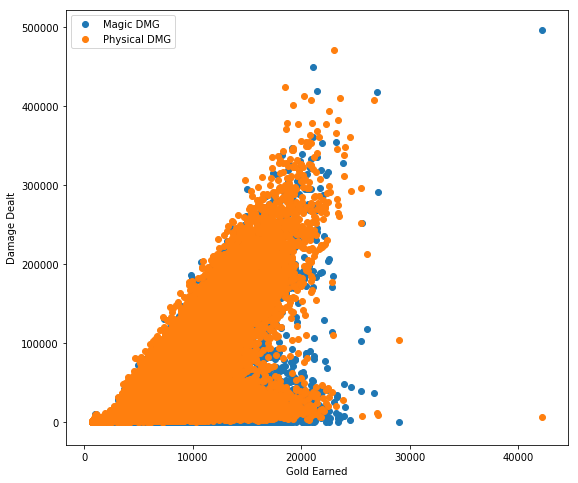

In [53]:
plt.figure(figsize= (9,8))
plt.scatter(df["participants_0_stats_goldEarned"], df["participants_0_stats_magicDamageDealt"], label = "Magic DMG")
plt.scatter(df["participants_0_stats_goldEarned"], df["participants_0_stats_physicalDamageDealt"], label = "Physical DMG")
plt.xlabel("Gold Earned")
plt.ylabel("Damage Dealt")
plt.legend()


# fit

In [12]:
#results = smf.logit('teams_0_win ~ participantIdentities_1_player_accountId', data=df).fit()
#results.summary()